In [315]:
import pickle 
print(pickle.format_version)

4.0


In [255]:
import requests
import urllib.request
import pandas_datareader as web
from pandas_datareader.yahoo.daily import YahooDailyReader
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import date, timedelta
plt.style.use('seaborn-darkgrid')

In [188]:
symbols = ['GC=F', 'DX-Y.NYB', '^GSPC', 'CL=F', '^JKSE']

today = date.today()
df_gold, df_dxy, df_snp, df_oil, df_jkse = 0, 0, 0, 0, 0
df = [df_gold, df_dxy, df_snp, df_oil, df_jkse]
for i, quotes in enumerate(symbols):
    df[i] = web.DataReader(quotes,
                    data_source='yahoo',
                    start='2002-01-01',
                    end=today)
# for dataframe in df:
#     print(dataframe.tail())

In [290]:
quote = symbols[4]
n_days = 40

new_df = YahooDailyReader(
                        symbols=quote, 
                        interval='d',
                        start='2002-01-01',
                        end=today
                        ).read()

new_df1 = YahooDailyReader(
                        symbols=quote, 
                        interval='w',
                        start='2002-01-01',
                        end=today
                        ).read()

new_df2 = YahooDailyReader(
                        symbols=quote, 
                        interval='m',
                        start='2002-01-01',
                        end=today
                        ).read()

In [278]:
n_bars = 55
new_df['ema10'] = new_df['Close'].ewm(span=10).mean()
new_df['ema20'] = new_df['Close'].ewm(span=20).mean()

In [282]:
new_df

,High,Low,Open,Close,Volume,Adj Close,ema10,ema20
Date,,,,,,,,
2002-01-02,387.308990,381.024994,387.308990,383.458008,1941400.0,383.458008,383.458008,383.458008
2002-01-03,383.458008,377.703003,383.458008,381.511993,1432500.0,381.511993,382.387700,382.436350
2002-01-04,388.282990,383.063995,383.063995,385.200989,3742400.0,385.200989,383.518623,383.451509
2002-01-07,388.723999,384.410004,385.770996,388.723999,4006400.0,388.723999,385.233563,384.973595
2002-01-08,391.445007,386.419006,388.098999,387.694000,4142200.0,387.694000,385.939887,385.631638
...,...,...,...,...,...,...,...,...
2022-05-31,7148.970215,7033.755859,7064.226074,7148.970215,279640300.0,7148.970215,6962.634356,6962.514507
2022-06-02,7209.079102,7117.979004,7130.601074,7148.723145,227362900.0,7148.723145,6996.468681,6980.248663
2022-06-03,7233.995117,7170.692871,7176.682129,7182.960938,240581300.0,7182.960938,7030.376364,6999.554594


In [288]:
n_bars = 50
ema10 = new_df['Close'].ewm(span=10).mean()
ema20 = new_df['Close'].ewm(span=20).mean()
ema10

Date
2002-01-02     383.458008
2002-01-03     382.387700
2002-01-04     383.518623
2002-01-07     385.233563
2002-01-08     385.939887
                 ...     
2022-05-31    6962.634356
2022-06-02    6996.468681
2022-06-03    7030.376364
2022-06-06    7042.413758
2022-06-07    7059.900141
Name: Close, Length: 4966, dtype: float64

In [295]:
pd.DataFrame([ema10, ema20]).transpose()

,Close,Close
Date,,
2022-03-16,6992.395020,6992.395020
2022-03-17,6976.989380,6977.689636
2022-03-18,6968.135663,6969.345229
2022-03-21,6963.867729,6965.256279
2022-03-22,6974.476231,6973.859270
2022-03-23,6980.096628,6978.554262
2022-03-24,6996.864644,6992.003335
2022-03-25,6998.154046,6993.823307
2022-03-28,7009.347544,7002.770647


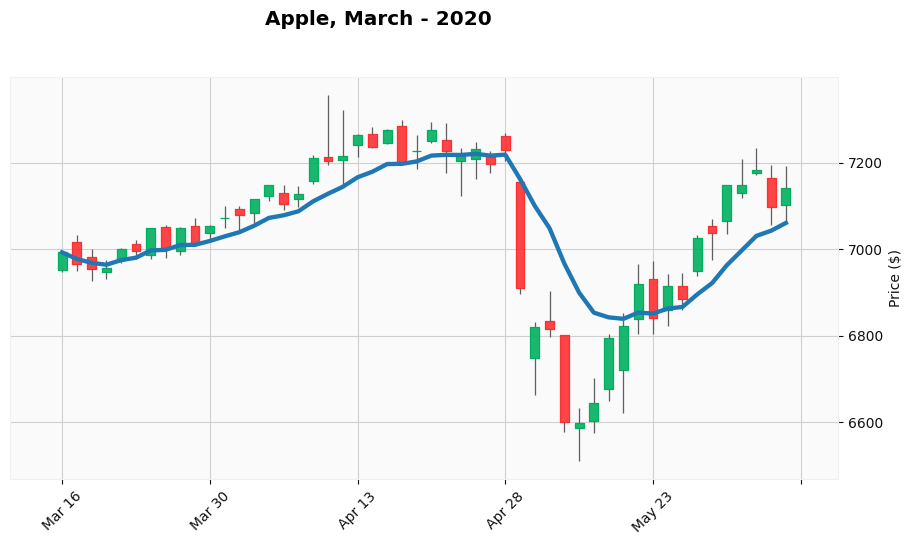

In [299]:
n_bars = 50
new_df['ema10'] = new_df.tail(n_bars)['Close'].ewm(span=10).mean()
new_df['ema20'] = new_df.tail(n_bars)['Close'].ewm(span=20).mean()
mpf.plot(
            new_df.tail(n_bars),
            type='candle',
            style='yahoo',
            title='Apple, March - 2020',
            ylabel='Price ($)',
            figratio=(18, 9)
            )


In [ ]:
# 1month
_5year_before = now - timedelta(days=1826)
data_week = new_df[new_df.index < str(_5year_before)]['Close'][-1]

In [210]:
days = [7, 30, 182, 365, 796, 1826]
_1week, _1month, _6month, _1year, _3year, _5year = [new_df[new_df.index < str(now - timedelta(days=n))]['Close'][-1] for n in days]
_1week, _1month, _6month, _1year, _3year, _5year 


(7037.56494140625,
 7228.9140625,
 6547.1162109375,
 6065.166015625,
 4466.037109375,
 5707.8310546875)

In [35]:
scaler_name = [
    'gold_scaler.pkl',
    'dxy_scaler.pkl',
    'gspc_scaler.pkl',
    'oil_scaler.pkl',
    'jkse_scaler.pkl'
]

with open('scaler/' + scaler_name[symbols.index(quote)], 'rb') as f:
    scaler = pickle.load(f)

/home/anugrahyogaprt/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/anugrahyogaprt/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator Pipeline from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [36]:
close_scaled = scaler.transform(np.array(new_df.Close).reshape(-1, 1))

In [338]:
text_title = ' Gold prices fell on Monday, pressured by an uptick in the U.S. dollar and Treasury yields, as attention turned to U.S. inflation data this week that could strengthen the case for aggressive interest rate hikes by the Federal Reserve.'

In [312]:
URL = 'https://backend-finalprojek.herokuapp.com/'
r = requests.get(URL)
r.json()

{'n_close': [1234.5678],
 'n_days': [40],
 'symbol': 'ABCD',
 'text': 'Halo teks abc'}

In [307]:
model_nlp = tf.keras.models.load_model('model_final')

nlp_result = model_nlp.predict([text_title])
nlp_result = nlp_result.argmax(axis=1)
nlp_result.tolist()

1/1 [==============================] - 0s 470ms/step


[1]

In [326]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [332]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
model_nlp2 = tf.keras.models.load_model('model_glove_conv1d_gap')

text_series = pd.Series(text_title)

input_tokenized = tokenizer.texts_to_sequences(text_series)
input_pad = pad_sequences(input_tokenized, maxlen=100, padding='post')

# run the inference
predict_proba = model_nlp2.predict(input_pad)
predictions = predict_proba.argmax(axis=1)
predict_proba, predictions

1/1 [==============================] - 0s 63ms/step


(array([[3.2301989e-05, 9.9957269e-01, 3.9500132e-04]], dtype=float32),
 array([1]))

In [339]:
data = {
    'symbol': quote,
    'n_close': close_scaled.tolist()[-n_days:],
    'n_days': [n_days],
    'teks': text_title
}

In [340]:
URL = 'https://backend-finalprojek.herokuapp.com/price'
r = requests.post(URL, json=data)
print(r.json())

if isinstance(r.json()['prediction'], list):
    result = scaler.inverse_transform(np.array(r.json()['prediction']))
    print(result[0, 0], r.json()['nlp_pred'][0])

{'code': 200, 'nlp_pred': [0], 'prediction': [[0.7917274832725525]], 'status': 'OK'}
118.77898603021004 0
